# **Instacart Basket Analysis 2024 - Part 2**

### **This Script Contains the Following Points**
#### 1. Importing Libraries & Data
#### 2. Additional Customer Comparions and Visualizations

### 1. Importing Libraries & Data

In [5]:
#import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#create folder path to Instacart dataset
path = r'/Users/kimkmiz/Documents/Instacart Basket Analysis 2024'

#importing Instacart dataset from part one
df = pd.read_pickle(os.path.join(path, '02 Data', 'IC24 Prepared Data', 'instacart_full_data.pkl'))

In [6]:
df.head(5)

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,customer_activity_flag,age_group,income_level,dependants_status,department,pet_owner,parent_of_baby,goods_category,shopping_time_category,profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,High Activity,Middle Age,High Income,has dependants,beverages,0,0,Purchases,Weekday Shopper,"Middle Age, High Income, Purchases, has depend..."
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,High Activity,Middle Age,High Income,has dependants,beverages,0,0,Purchases,Weekend/Evening Shopper,"Middle Age, High Income, Purchases, has depend..."
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,High Activity,Middle Age,High Income,has dependants,beverages,0,0,Purchases,Weekday Shopper,"Middle Age, High Income, Purchases, has depend..."
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,High Activity,Middle Age,High Income,has dependants,produce,0,0,Purchases,Weekday Shopper,"Middle Age, High Income, Purchases, has depend..."
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,High Activity,Middle Age,High Income,has dependants,produce,0,0,Purchases,Weekday Shopper,"Middle Age, High Income, Purchases, has depend..."


In [7]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_product_price', 'spending_flag',
       'median_days_between_orders', 'order_frequency', 'region',
       'customer_activity_flag', 'age_group', 'income_level',
       'dependants_status', 'department', 'pet_owner', 'parent_of_baby',
       'goods_category', 'shopping_time_category', 'profile'],
      dtype='object')

In [8]:
df.dtypes

user_id                         int64
Gender                         object
STATE                          object
Age                             int64
date_joined                    object
number_of_dependants            int64
marital_status                 object
income                          int64
product_id                      int64
product_name                   object
aisle_id                        int64
department_id                   int64
prices                        float64
order_id                        int64
order_number                    int64
order_day_of_week               int64
order_hour_of_day               int64
days_since_prior_order        float64
add_to_cart_order               int64
reordered                       int64
price_range_loc                object
busiest_days                   object
busiest_period_of_day          object
max_order                       int64
loyalty_flag                   object
mean_product_price            float64
spending_fla

### 2. Additional Customer Comparions and Visualizations

In [10]:
#Compare days of week by region

order_day_region_crosstab=pd.crosstab(df['order_day_of_week'], df['region'], dropna=False)

In [11]:
#print crosstab
order_day_region_crosstab

region,Midwest,Northeast,South,West
order_day_of_week,,,,
0,1460186,1097258,2052776,1593962
1,1320759,999953,1892057,1447461
2,991770,746153,1404662,1071245
3,895093,679308,1287335,978798
4,888131,666326,1258537,970808
5,983262,746455,1399737,1076337
6,1058124,787283,1496781,1154302


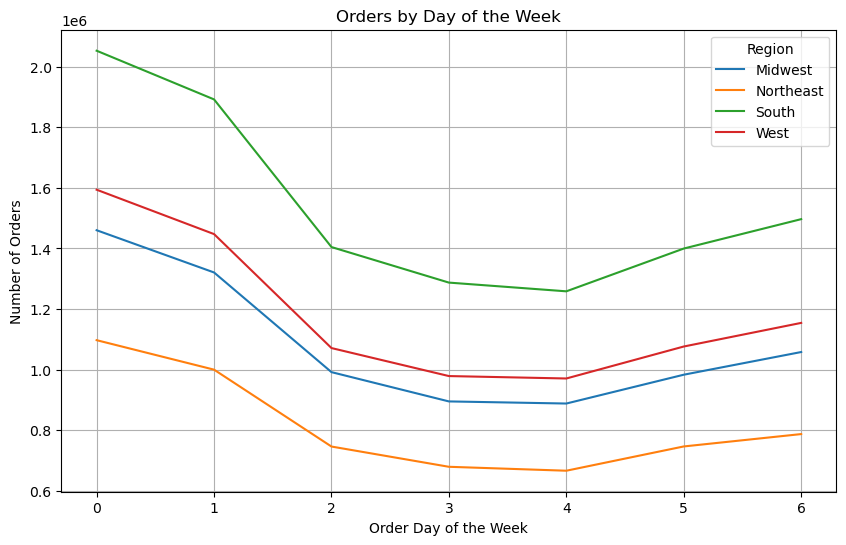

In [12]:
#Creating line chart of crosstab
order_day_of_week_by_region_LINE = plt.figure(figsize=(10, 6))
for region in order_day_region_crosstab.columns:
    plt.plot(order_day_region_crosstab.index, order_day_region_crosstab[region], label=region)

plt.xlabel('Order Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Orders by Day of the Week')
plt.legend(title='Region')
plt.grid(True)
plt.show()

In [13]:
#Export chart
order_day_of_week_by_region_LINE.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','order_day_of_week_region_LINE.png'))

In [14]:
#Compare hour of day by region

order_hour_region_crosstab=pd.crosstab(df['order_hour_of_day'], df['region'], dropna=False)

In [15]:
#print crosstab
order_hour_region_crosstab

region,Midwest,Northeast,South,West
order_hour_of_day,,,,
0,50748,38557,73297,56167
1,27360,21543,37906,28891
2,16987,12436,21980,17972
3,11909,9218,17437,12717
4,12690,9507,17966,13079
5,19858,15395,30838,21870
6,67296,50545,98696,73956
7,208272,158950,297744,226088
8,398142,305344,579045,435587


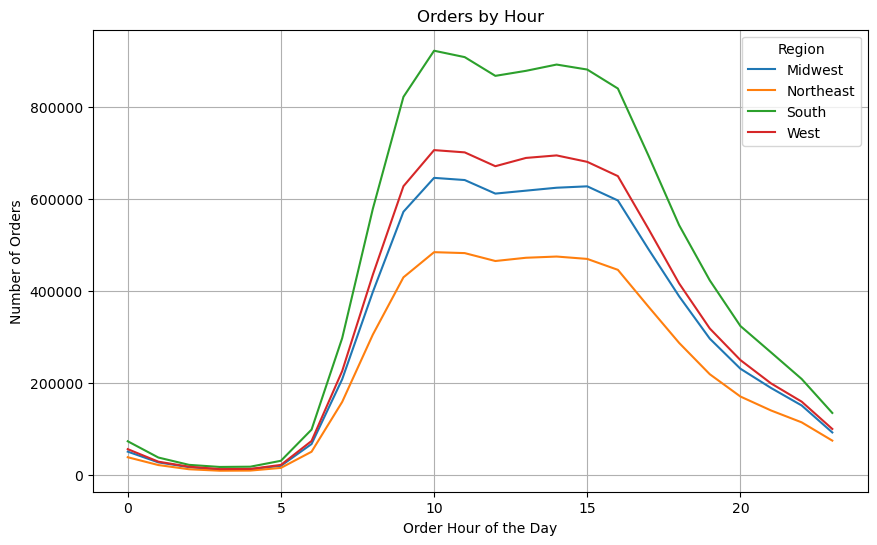

In [28]:
#create chart
order_hour_region_line_2 = plt.figure(figsize=(10, 6))
for region in order_hour_region_crosstab.columns:
    plt.plot(order_hour_region_crosstab.index, order_hour_region_crosstab[region], label=region)

plt.xlabel('Order Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour')
plt.legend(title='Region')
plt.grid(True)
plt.show()

In [30]:
#Export chart
order_hour_region_line_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','order_hour_region_LINE.png'))

In [32]:
#Compare times of the day where customers spend the most/least 
#Create 'period_of_day' columns to flag for 'Morning', 'Afternoon', 'Evening', or 'Late Night'
# Create morning group
df.loc[((df['order_hour_of_day'] >= 5) & (df['order_hour_of_day'] <= 11)), 'period_of_day'] = 'Morning'

# Create afternoon group
df.loc[((df['order_hour_of_day'] >= 12) & (df['order_hour_of_day'] <= 16)), 'period_of_day'] = 'Afternoon'

# Create evening group
df.loc[((df['order_hour_of_day'] >= 17) & (df['order_hour_of_day'] <= 21)), 'period_of_day'] = 'Evening'

# Create late night group
df.loc[((df['order_hour_of_day'] == 0) | (df['order_hour_of_day'] >= 22) & (df['order_hour_of_day'] <= 24)) | ((df['order_hour_of_day'] >= 1) & (df['order_hour_of_day'] <= 4)), 'period_of_day'] = 'Late Night'

In [33]:
#check frequency
df['period_of_day'].value_counts(dropna=False)

period_of_day
Afternoon     13165968
Morning       10939729
Evening        6754254
Late Night     1544908
Name: count, dtype: int64

In [34]:
#Compare period of day and prices

period_of_day_prices_crosstab=pd.crosstab(df['period_of_day'], df['prices'], dropna=False)

In [35]:
#check output
period_of_day_prices_crosstab

prices,1.00,1.10,1.20,1.30,1.40,1.49,1.50,1.60,1.70,1.80,...,24.10,24.20,24.30,24.40,24.50,24.60,24.70,24.80,24.90,25.00
period_of_day,,,,,,,,,,,,,,,,,,,,,
Afternoon,47798,96852,106528,170034,160148,1827,63033,118863,85640,128714,...,410,6318,1225,209,924,801,3043,174,2361,5869
Evening,24862,51478,53506,89170,78886,1005,32113,62102,45578,64969,...,210,3456,631,105,513,442,1429,81,1249,2796
Late Night,5271,12297,11657,20652,18965,174,7203,13963,10953,14803,...,39,820,126,22,58,102,326,27,236,632
Morning,37212,82155,84567,145835,134210,1423,52178,104424,71796,112698,...,319,5297,907,163,653,617,2485,128,1935,4475


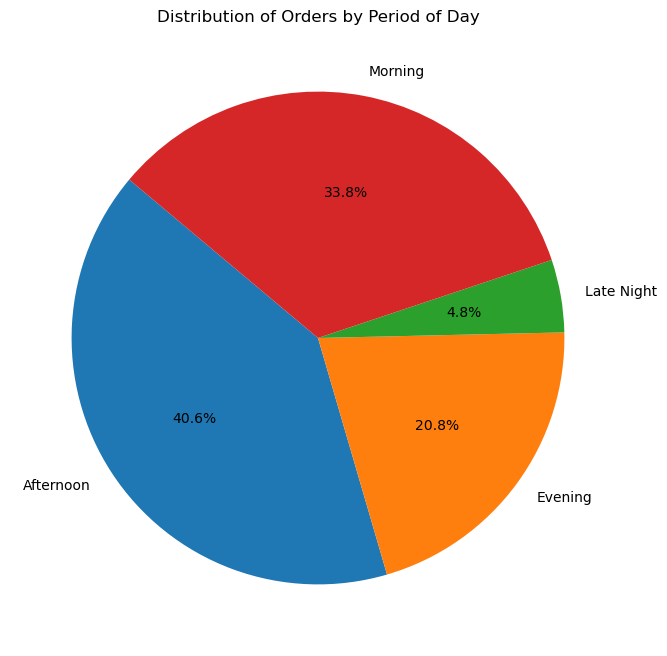

In [36]:
# Aggregate the data to get total counts per period_of_day
period_counts = period_of_day_prices_crosstab.sum(axis=1)

# Plotting the pie chart
orders_placed_period_day_pie=plt.figure(figsize=(8, 8))
plt.pie(period_counts, labels=period_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Orders by Period of Day')
plt.show()

In [37]:
#export
orders_placed_period_day_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_placed_period_day_pie.png'))

In [38]:
#Compare period of day and prices

period_of_day_spending_crosstab=pd.crosstab(df['period_of_day'], df['price_range_loc'], dropna=False)

In [39]:
period_of_day_spending_crosstab

price_range_loc,High-range product,Low-range product,Mid-range product
period_of_day,,,
Afternoon,171994,4107516,8886458
Evening,85521,2103275,4565458
Late Night,19431,479342,1046135
Morning,135605,3440617,7363507


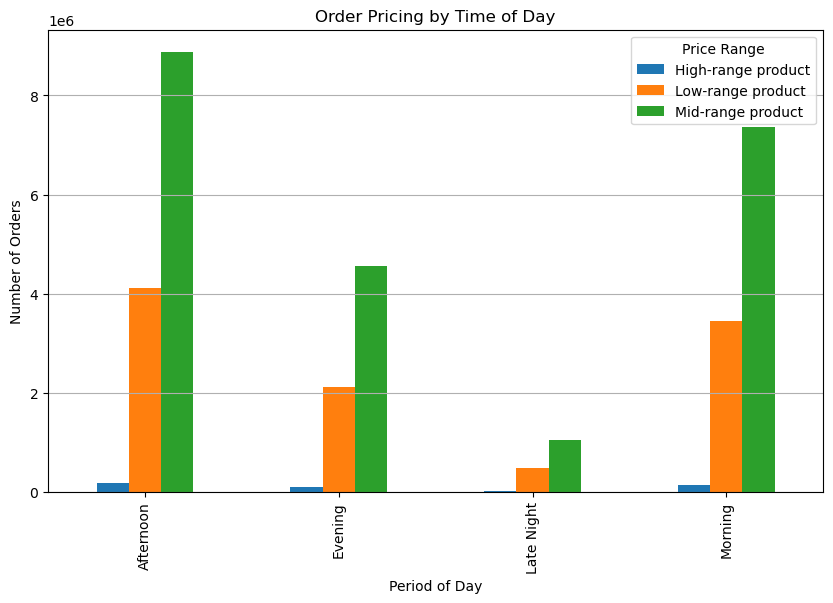

In [40]:
#create chart
period_of_day_pricing=period_of_day_spending_crosstab.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Period of Day')
plt.ylabel('Number of Orders')
plt.title('Order Pricing by Time of Day')
plt.legend(title='Price Range')
plt.grid(axis='y')
plt.show()

In [41]:
#export
period_of_day_pricing.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','period_of_day_pricing_bar.png'))

In [89]:
#Create crosstab of order_frequency and age_group

order_frequency_by_age_crosstab = pd.crosstab(df['age_group'], df['order_frequency'], dropna = False)

In [91]:
#print crosstab

order_frequency_by_age_crosstab

order_frequency,Frequent customer,Non-frequent customer,Regular customer,NaN
age_group,,,,
Middle Age,10110383,1711300,3400978,0
Senior,7060357,1183102,2339375,5
Young Adult,4389113,742035,1468211,0


In [93]:
#Filter out rows with missing values in 'order_frequency'because missing values are for new customers with onle 1 order
filtered_df = df.dropna(subset=['order_frequency'])

# Create the crosstab excluding missing values in 'order_frequency'
order_frequency_by_age_crosstab = pd.crosstab(filtered_df['age_group'], filtered_df['order_frequency'])

# Display the crosstab
print(order_frequency_by_age_crosstab)

order_frequency  Frequent customer  Non-frequent customer  Regular customer
age_group                                                                  
Middle Age                10110383                1711300           3400978
Senior                     7060357                1183102           2339375
Young Adult                4389113                 742035           1468211


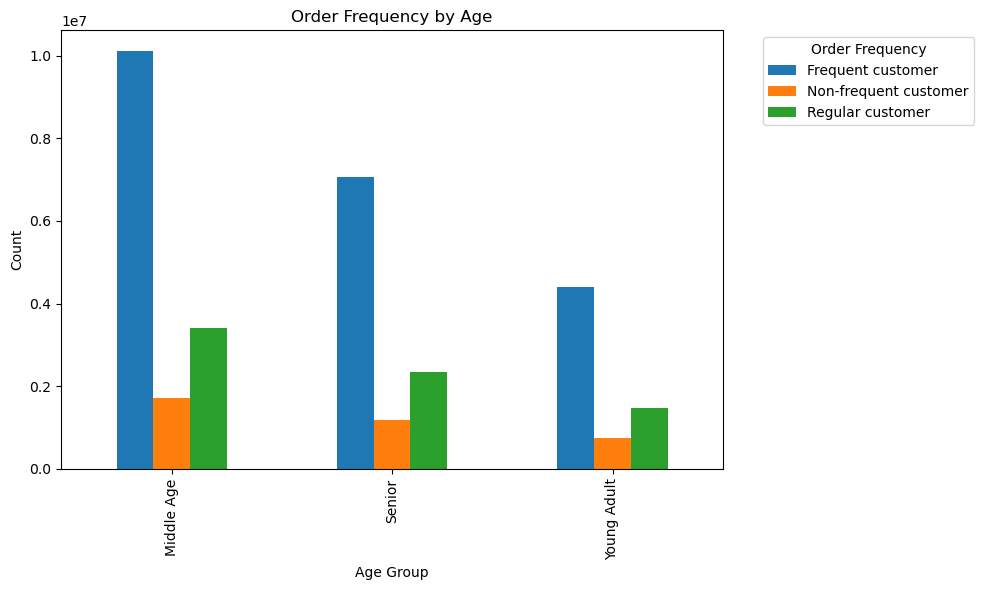

In [95]:
#plot the crosstab as a bar chart

order_frequency_by_age_bar = order_frequency_by_age_crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Order Frequency by Age')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Order Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [97]:
#export chart
order_frequency_by_age_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','order_frequency_by_age_bar.png'))

In [99]:
#Create crosstab of order_frequency and marital_status

order_frequency_by_marital_status_crosstab = pd.crosstab(df['marital_status'], df['order_frequency'], dropna = False)

In [101]:
#print crosstab
order_frequency_by_marital_status_crosstab

order_frequency,Frequent customer,Non-frequent customer,Regular customer,NaN
marital_status,,,,
divorced/widowed,1852101,306903,612808,0
living with parents and siblings,1047100,175019,328484,0
married,15137381,2564637,5054730,5
single,3523271,589878,1212542,0


In [103]:
#Filter out rows with missing values in 'order_frequency'because missing values are for new customers with onle 1 order
filtered_df = df.dropna(subset=['order_frequency'])

# Create the crosstab excluding missing values in 'order_frequency'
order_frequency_by_marital_status_crosstab = pd.crosstab(filtered_df['marital_status'], filtered_df['order_frequency'])

# Display the crosstab
print(order_frequency_by_marital_status_crosstab)

order_frequency                   Frequent customer  Non-frequent customer  \
marital_status                                                               
divorced/widowed                            1852101                 306903   
living with parents and siblings            1047100                 175019   
married                                    15137381                2564637   
single                                      3523271                 589878   

order_frequency                   Regular customer  
marital_status                                      
divorced/widowed                            612808  
living with parents and siblings            328484  
married                                    5054730  
single                                     1212542  


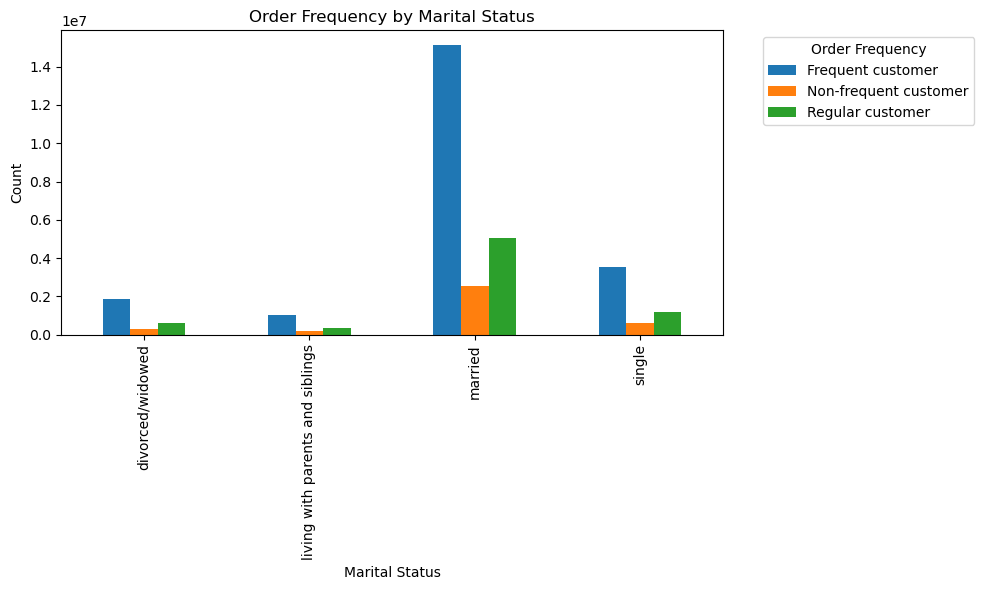

In [105]:
#plot the crosstab as a bar chart

order_frequency_by_marital_status_bar = order_frequency_by_marital_status_crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Order Frequency by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Order Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [109]:
#export chart
order_frequency_by_marital_status_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','order_frequency_by_marital_status_bar.png'))

In [111]:
#Create crosstab of spending_flag and loyalty_flag

spending_habits_by_loyalty_crosstab = pd.crosstab(df['spending_flag'], df['loyalty_flag'], dropna = False)

In [113]:
#print crosstab

spending_habits_by_loyalty_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
spending_flag,,,
High spender,13896,58613,47185
Low spender,10270197,6185377,15829591


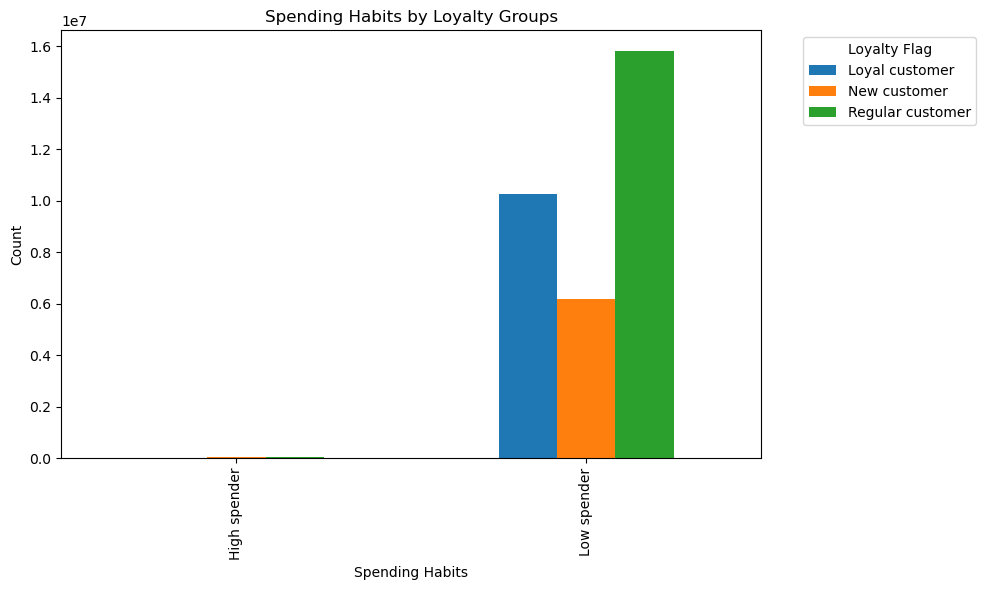

In [115]:
#create chart

spending_habits_by_loyalty_bar= spending_habits_by_loyalty_crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Spending Habits by Loyalty Groups')
plt.xlabel('Spending Habits')
plt.ylabel('Count')
plt.legend(title='Loyalty Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

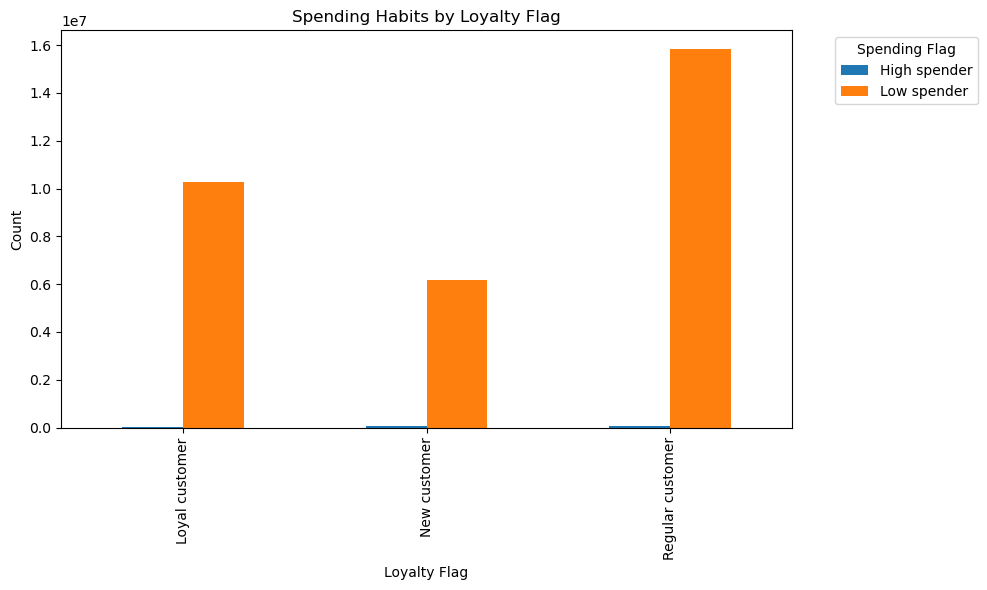

In [117]:
# Transpose the crosstab to have loyalty_flag on the x-axis
spending_habits_by_loyalty_crosstab = spending_habits_by_loyalty_crosstab.T

# Plot the crosstab as a bar chart
spending_habits_by_loyalty_bar=spending_habits_by_loyalty_crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Spending Habits by Loyalty Flag')
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')
plt.legend(title='Spending Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [119]:
#export chart
spending_habits_by_loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','spending_habits_by_loyalty_bar.png'))

In [121]:
#Create crosstab of order_day_of_week and loyalty_flag

order_day_of_week_by_loyalty_crosstab = pd.crosstab(df['order_day_of_week'], df['loyalty_flag'], dropna = False)

#print crosstab

order_day_of_week_by_loyalty_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
order_day_of_week,,,
0,1754731,1280451,3169000
1,1843401,1067446,2749383
2,1352343,814412,2047075
3,1266495,731417,1842622
4,1292042,694739,1797021
5,1456715,759780,1989296
6,1318366,895745,2282379


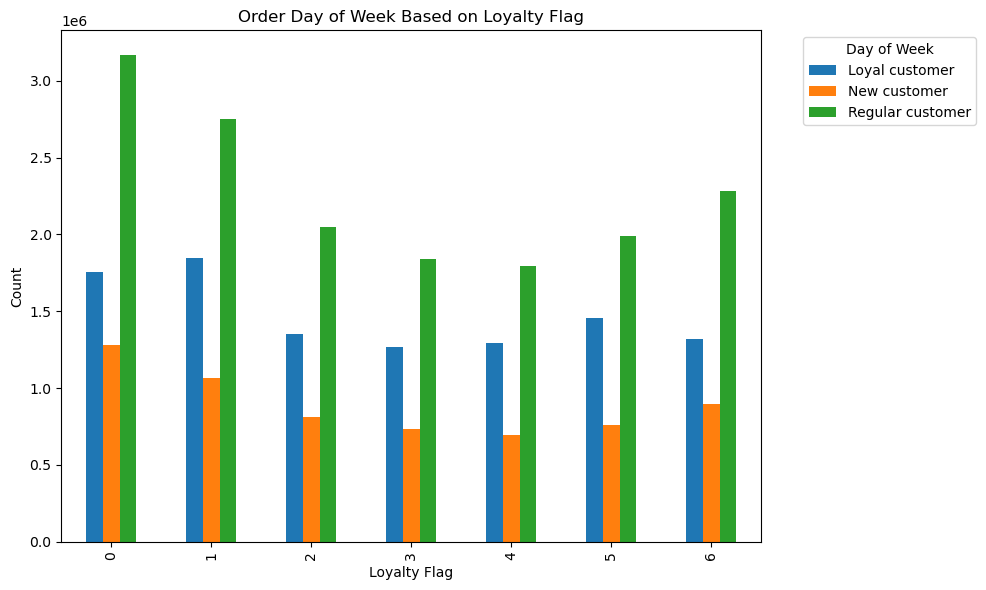

In [125]:
#Plot the crosstab as a bar chart
order_day_of_week_by_loyalty_bar=order_day_of_week_by_loyalty_crosstab.plot(kind='bar', figsize=(10, 6))
plt.title('Order Day of Week Based on Loyalty Flag')
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [127]:
#export chart
order_day_of_week_by_loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','order_day_of_week_by_loyalty_bar.png'))

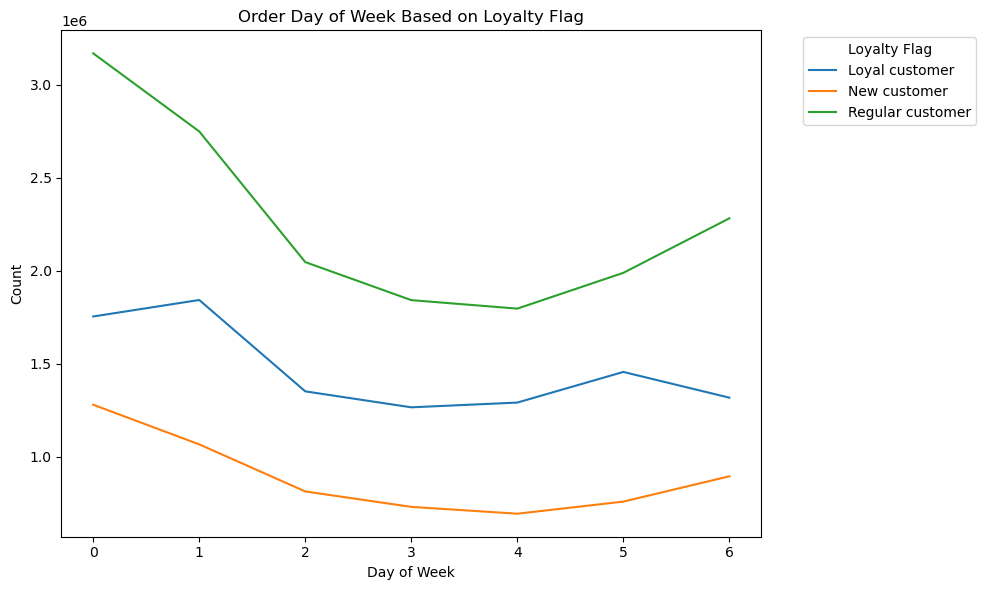

In [129]:
# Plot the crosstab as a line chart
order_day_of_week_by_loyalty_line = order_day_of_week_by_loyalty_crosstab.plot(kind='line', figsize=(10, 6))
plt.title('Order Day of Week Based on Loyalty Flag')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Loyalty Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [131]:
#export chart
order_day_of_week_by_loyalty_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','order_day_of_week_by_loyalty_line.png'))

In [133]:
#Create crosstab of period_of_day and loyalty_flag

period_of_day_by_loyalty_crosstab = pd.crosstab(df['period_of_day'], df['loyalty_flag'], dropna = False)

#print crosstab

period_of_day_by_loyalty_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
period_of_day,,,
Afternoon,4020166,2645769,6500033
Evening,1968037,1411650,3374567
Late Night,469653,307925,767330
Morning,3826237,1878646,5234846


In [135]:
#Create crosstab of order_hour_of_day and loyalty_flag

order_hour_loyalty_crosstab = pd.crosstab(df['order_hour_of_day'], df['loyalty_flag'], dropna = False)

#print crosstab

order_hour_loyalty_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,61748,46038,110983
1,30179,26753,58768
2,17788,15925,35662
3,13374,11995,25912
4,16882,10921,25439
5,29350,16018,42593
6,112865,43381,134247
7,346694,130011,414349
8,643895,267132,807091


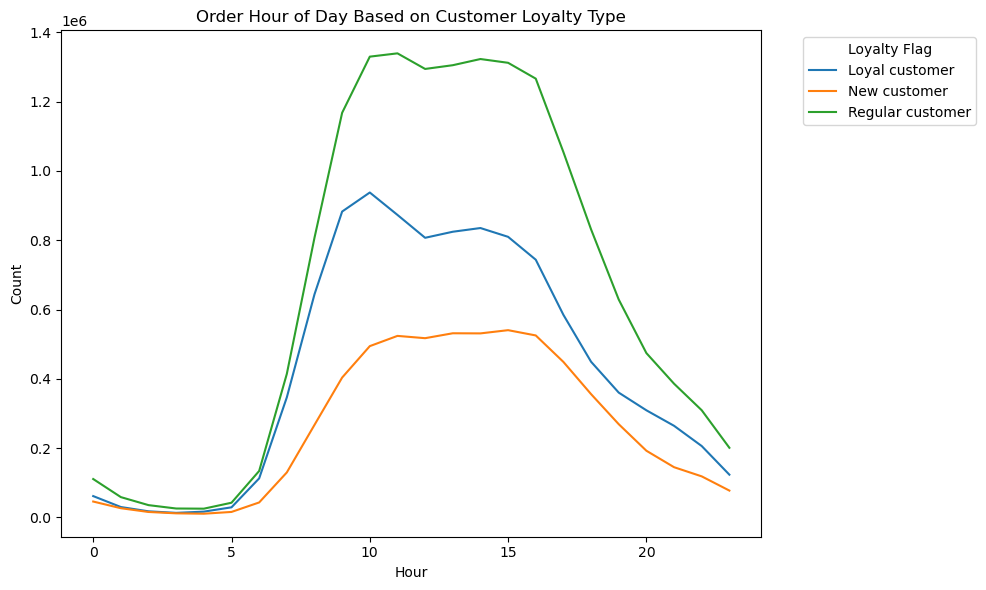

In [137]:
# Plot the crosstab as a line chart
order_hour_loyalty_line = order_hour_loyalty_crosstab.plot(kind='line', figsize=(10, 6))
plt.title('Order Hour of Day Based on Customer Loyalty Type')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Loyalty Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [139]:
#export chart
order_hour_loyalty_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','order_hour_loyalty_line.png'))